# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [3]:
diab_df=pd.read_csv('diabetes.csv')
diab_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Seperation of the output Variable

In [6]:
y=diab_df['Outcome']
diab_df.drop(columns=['Outcome'],inplace=True)
diab_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


# Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split as ttsplit
X_train,X_test,y_train,y_test=ttsplit(diab_df,y,test_size=0.2,random_state=10)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
120,0,162,76,56,100,53.2,0.759,25
172,2,87,0,23,0,28.9,0.773,25
307,0,137,68,14,148,24.8,0.143,21
7,10,115,0,0,0,35.3,0.134,29
448,0,104,64,37,64,33.6,0.510,22
...,...,...,...,...,...,...,...,...
369,1,133,102,28,140,32.8,0.234,45
320,4,129,60,12,231,27.5,0.527,31
527,3,116,74,15,105,26.3,0.107,24
125,1,88,30,42,99,55.0,0.496,26


# Scaling the continuous variables

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sc_train=pd.DataFrame()
sc_test=pd.DataFrame()
for col in X_train.columns:
    sc_train[col]=scaler.fit_transform(np.array(X_train[col]).reshape(-1,1)).reshape(1,-1)[0]
    sc_test[col]=scaler.transform(np.array(X_test[col]).reshape(-1,1)).reshape(1,-1)[0]
sc_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.132844,1.243738,0.347237,2.233673,0.153677,2.727763,0.907497,-0.698457
1,-0.542130,-1.052095,-3.486085,0.141560,-0.680680,-0.369792,0.950374,-0.698457
2,-1.132844,0.478461,-0.056271,-0.429016,0.554168,-0.892424,-0.979075,-1.038817
3,1.820728,-0.194984,-3.486085,-1.316580,-0.680680,0.446025,-1.006638,-0.358098
4,-1.132844,-0.531706,-0.258025,1.029123,-0.146692,0.229324,0.144906,-0.953727
...,...,...,...,...,...,...,...,...
609,-0.837487,0.356016,1.658636,0.458547,0.487419,0.127347,-0.700377,1.003340
610,0.048585,0.233572,-0.459778,-0.555811,1.246684,-0.548252,0.196970,-0.187918
611,-0.246772,-0.164373,0.246360,-0.365619,0.195394,-0.701217,-1.089329,-0.783547
612,-0.837487,-1.021484,-1.972932,1.346110,0.145333,2.957212,0.102029,-0.613368


In [16]:
X_train=sc_train
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.132844,1.243738,0.347237,2.233673,0.153677,2.727763,0.907497,-0.698457
1,-0.542130,-1.052095,-3.486085,0.141560,-0.680680,-0.369792,0.950374,-0.698457
2,-1.132844,0.478461,-0.056271,-0.429016,0.554168,-0.892424,-0.979075,-1.038817
3,1.820728,-0.194984,-3.486085,-1.316580,-0.680680,0.446025,-1.006638,-0.358098
4,-1.132844,-0.531706,-0.258025,1.029123,-0.146692,0.229324,0.144906,-0.953727
...,...,...,...,...,...,...,...,...
609,-0.837487,0.356016,1.658636,0.458547,0.487419,0.127347,-0.700377,1.003340
610,0.048585,0.233572,-0.459778,-0.555811,1.246684,-0.548252,0.196970,-0.187918
611,-0.246772,-0.164373,0.246360,-0.365619,0.195394,-0.701217,-1.089329,-0.783547
612,-0.837487,-1.021484,-1.972932,1.346110,0.145333,2.957212,0.102029,-0.613368


In [17]:
X_test=sc_test
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.048585,0.998849,0.145483,0.521944,0.370609,-0.063860,-0.381864,0.322621
1,-0.542130,-0.286817,0.851621,1.346110,0.654291,0.841187,-0.663625,-0.443188
2,-0.837487,0.417238,-0.762409,-1.316580,-0.680680,-0.650229,0.686989,2.449867
3,-0.246772,-0.439873,-0.358902,-0.492414,-0.280189,-1.134620,0.659425,-0.868637
4,-0.246772,-0.592928,0.246360,-1.316580,-0.680680,-0.293309,-1.046452,-0.102828
...,...,...,...,...,...,...,...,...
149,0.048585,0.049905,-0.358902,-1.316580,-0.680680,0.025370,-0.724877,0.152441
150,1.820728,-0.194984,-3.486085,-1.316580,-0.680680,-4.053715,-0.617686,-0.273008
151,1.230014,-1.113317,-0.711971,-0.048632,-0.680680,-0.943413,-1.000513,0.748070
152,0.343942,0.264183,0.649867,-1.316580,-0.680680,0.930417,1.510833,0.322621


# Training the dataset on Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression as lr
logistic=lr()
logistic.fit(X_train,y_train)
pred=logistic.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [19]:
prob_pred=logistic.predict_proba(X_test)
prob_pred

array([[0.45735998, 0.54264002],
       [0.79113315, 0.20886685],
       [0.5202281 , 0.4797719 ],
       [0.89794521, 0.10205479],
       [0.90326876, 0.09673124],
       [0.95220792, 0.04779208],
       [0.91548168, 0.08451832],
       [0.68593986, 0.31406014],
       [0.93091034, 0.06908966],
       [0.64160063, 0.35839937],
       [0.92569163, 0.07430837],
       [0.77120059, 0.22879941],
       [0.08946581, 0.91053419],
       [0.67631703, 0.32368297],
       [0.88976012, 0.11023988],
       [0.30621654, 0.69378346],
       [0.23408339, 0.76591661],
       [0.95062855, 0.04937145],
       [0.89728234, 0.10271766],
       [0.06544026, 0.93455974],
       [0.65782892, 0.34217108],
       [0.50914597, 0.49085403],
       [0.63960353, 0.36039647],
       [0.76282881, 0.23717119],
       [0.82901284, 0.17098716],
       [0.33503272, 0.66496728],
       [0.68478391, 0.31521609],
       [0.98612052, 0.01387948],
       [0.35198529, 0.64801471],
       [0.18376217, 0.81623783],
       [0.

In [22]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_curve,f1_score
print(accuracy_score(y_test,pred))
print(recall_score(y_test,pred))
print(precision_score(y_test,pred))
print(f1_score(y_test,pred))

0.7662337662337663
0.5084745762711864
0.8108108108108109
0.6249999999999999


In [23]:
pos_probab=prob_pred[::,1]  #Considering only the trues(1) probabilities
fpr,tpr,threshold=roc_curve(y_test,pos_probab)
print(fpr)
print(tpr)
print(threshold)

[0.         0.         0.         0.01052632 0.01052632 0.02105263
 0.02105263 0.04210526 0.04210526 0.05263158 0.05263158 0.13684211
 0.13684211 0.14736842 0.14736842 0.15789474 0.15789474 0.24210526
 0.24210526 0.25263158 0.25263158 0.27368421 0.27368421 0.28421053
 0.28421053 0.29473684 0.29473684 0.31578947 0.31578947 0.33684211
 0.33684211 0.34736842 0.34736842 0.36842105 0.36842105 0.45263158
 0.45263158 0.64210526 0.64210526 0.71578947 0.71578947 0.8
 0.8        1.         1.        ]
[0.         0.01694915 0.22033898 0.22033898 0.25423729 0.25423729
 0.27118644 0.27118644 0.28813559 0.28813559 0.50847458 0.50847458
 0.55932203 0.55932203 0.6440678  0.6440678  0.6779661  0.6779661
 0.71186441 0.71186441 0.72881356 0.72881356 0.76271186 0.76271186
 0.77966102 0.77966102 0.81355932 0.81355932 0.84745763 0.84745763
 0.88135593 0.88135593 0.89830508 0.89830508 0.91525424 0.91525424
 0.93220339 0.93220339 0.94915254 0.94915254 0.96610169 0.96610169
 0.98305085 0.98305085 1.        ]


0.7173951828724353

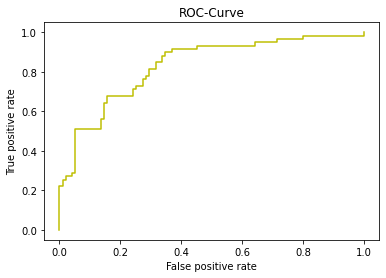

In [24]:
from sklearn.metrics import roc_auc_score as area
plt.plot(fpr,tpr,'y')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC-Curve")
area(y_test,pred)